# SARIMA

A seasonal autoregressive integrated moving average (SARIMA) model is one step different from an ARIMA model based on the concept of seasonal trends. In many time series data, frequent seasonal effects come into play. Take for example the average temperature measured in a location with four seasons.

In [1]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
data <- read.csv('elec-demand.csv')

In [3]:
head(data)

x
7621.422
7715.866
8767.733
7917.311
9046.280
9253.413


In [4]:
str(data)

'data.frame':	122 obs. of  1 variable:
 $ x: num  7621 7716 8768 7917 9046 ...


In [6]:
y<- ts(data$x,start =1975,frequency = 12)

In [7]:
y

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1975,7621.422,7715.866,8767.733,7917.311,9046.280,9253.413,9875.043,9580.643,8889.871,8486.199,8433.107,8211.550
1976,8376.159,7889.076,8612.186,8252.772,8849.933,9697.925,10411.592,9618.656,9424.734,8729.287,8676.467,8359.750
1977,7843.597,8089.115,8452.316,8398.840,8950.342,9768.560,10092.609,9943.722,9513.400,9192.929,8785.671,8558.317
1978,8718.534,8584.502,9091.607,9287.359,9154.798,10462.253,10512.379,11172.631,10180.452,9811.215,9576.289,9269.552
1979,9106.650,9147.134,9158.461,9606.271,9480.056,10657.793,10997.100,11428.869,10808.829,10434.661,10050.919,9633.324
1980,9542.623,9676.117,9314.722,10484.530,10039.248,10616.983,11181.443,12193.850,11750.880,10324.827,10597.272,9803.746
1981,10201.436,10151.910,9808.708,11051.981,10568.057,11452.898,11640.006,12643.027,12075.117,11301.846,11061.285,10884.474
1982,11146.280,10978.208,10721.892,11370.606,10847.188,11777.914,12035.573,12413.084,12674.973,11814.654,12126.365,11419.933
1983,11830.346,11441.551,11462.388,12095.171,11986.334,12234.005,13154.810,13519.797,13663.217,13208.085,12465.138,12249.649
1984,12414.839,12513.394,12381.322,12419.675,12498.764,12945.729,13464.858,14102.687,14341.480,13788.005,12555.903,12771.377


### 1) Plot the series and search for possible outliers. 

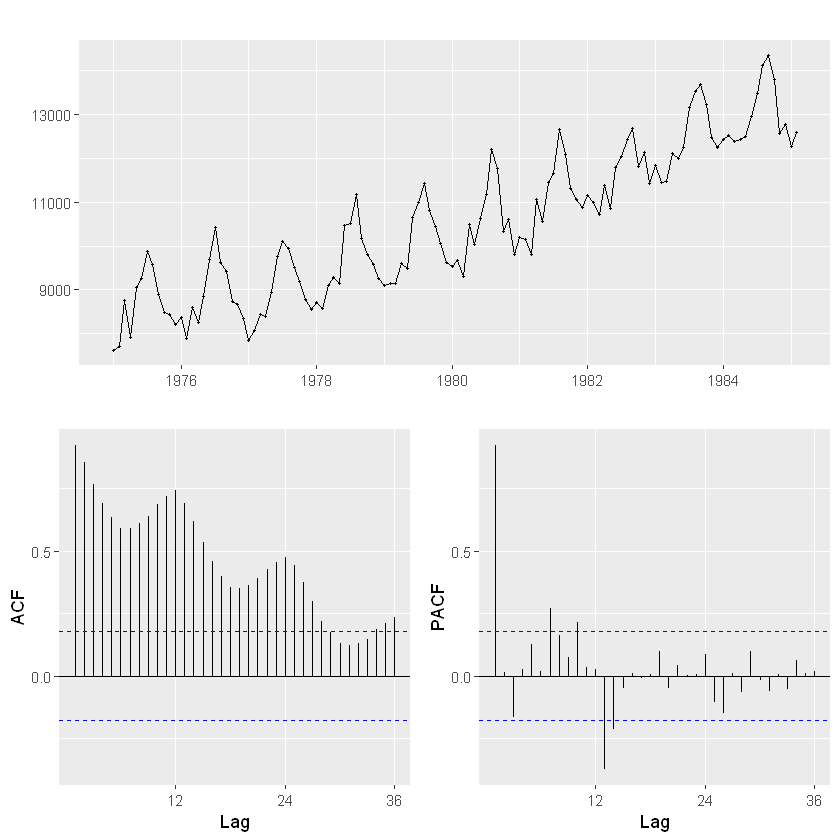

In [8]:
ggtsdisplay(y)

### 2) Stabilize the variance by transforming the data (Box-Cox).

Let's check the transformation of data is required or not 

In [9]:
BoxCox.lambda(y)

[1] 0.9760307

This value is pretty near to 1 so we don't have to go for transformation as we can see from the graph the variance is equal 

### 3) Analyse the stationarity of the transformed series. 

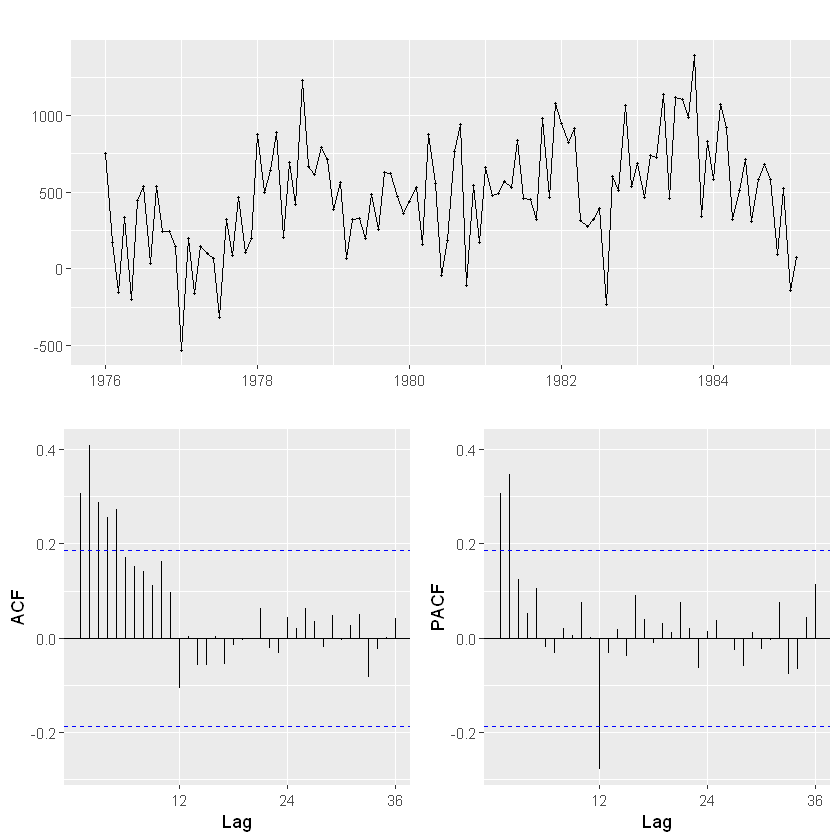

In [10]:
y.sdiff <- diff(y,lag=12,differences = 1)
ggtsdisplay(y.sdiff)

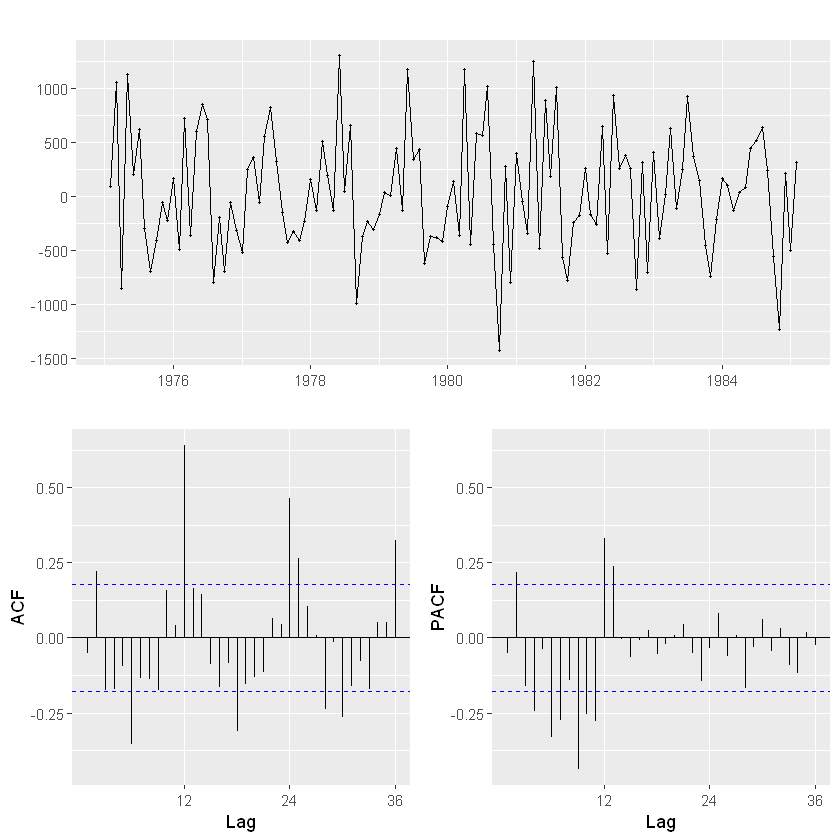

In [11]:
y.rdiff <- diff(y)
ggtsdisplay(y.rdiff)

Let's apply both Regular and Seasonal Derivative 

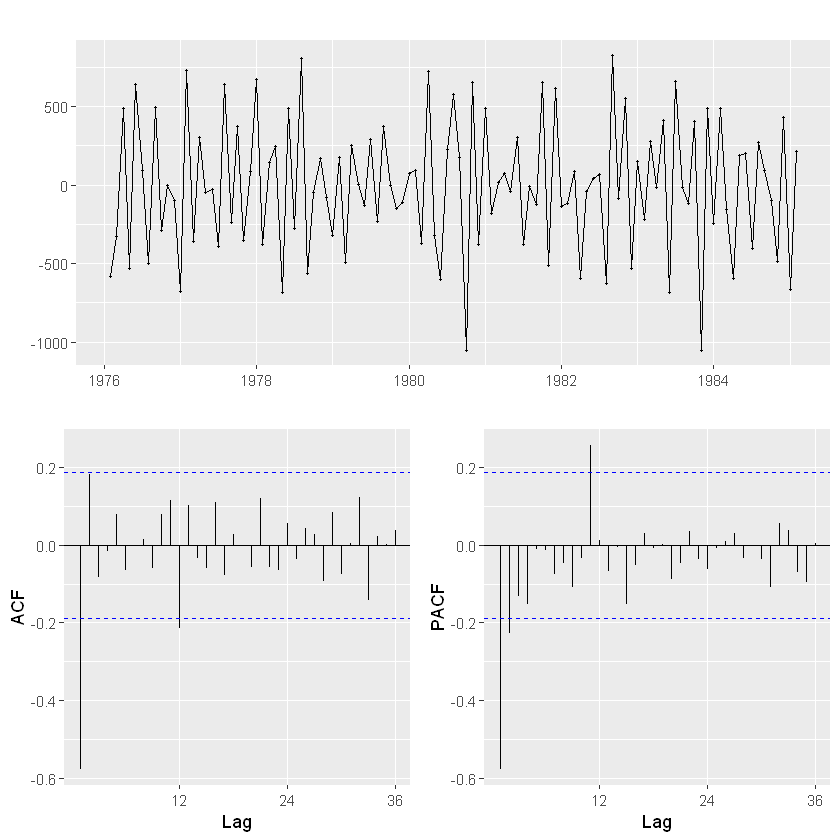

In [12]:
y.rdiff.sdiff <- diff(diff(y,lag =12))
ggtsdisplay(y.rdiff.sdiff)

In [13]:
fit1 <- Arima(y,order=c(0,1,0),
             seasonal=c(1,1,0),
             lambda= NULL,
             include.constant = TRUE)

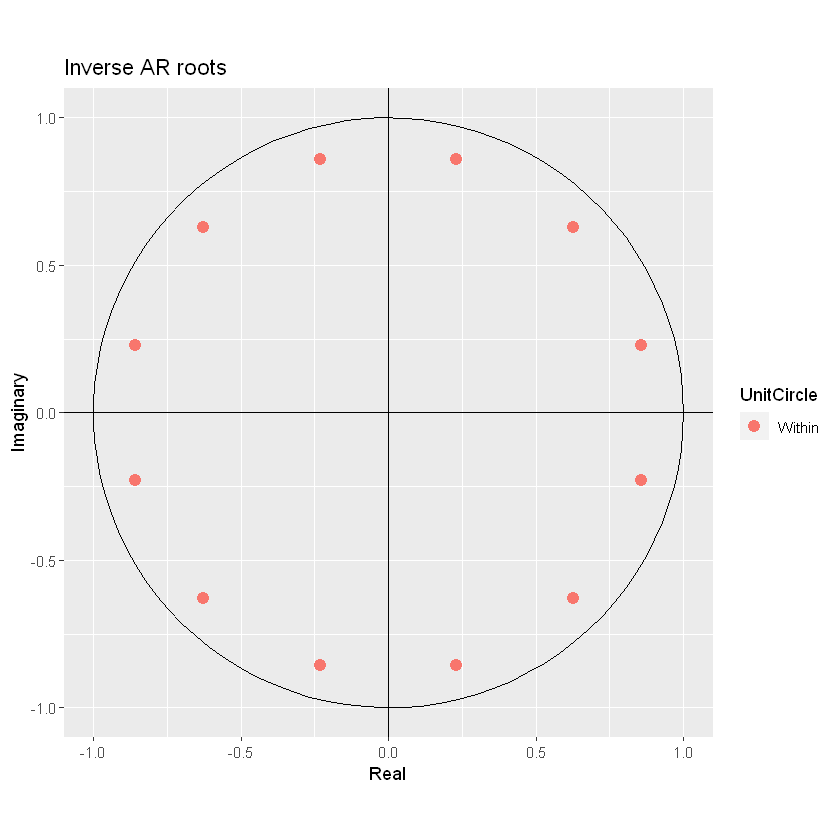

In [14]:
autoplot(fit1)

In [15]:
library(lmtest)

Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [16]:
coeftest(fit1)


z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)  
sar1 -0.239667   0.097626  -2.455  0.01409 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(1,1,0)[12]
Q* = 59.229, df = 23, p-value = 4.934e-05

Model df: 1.   Total lags used: 24



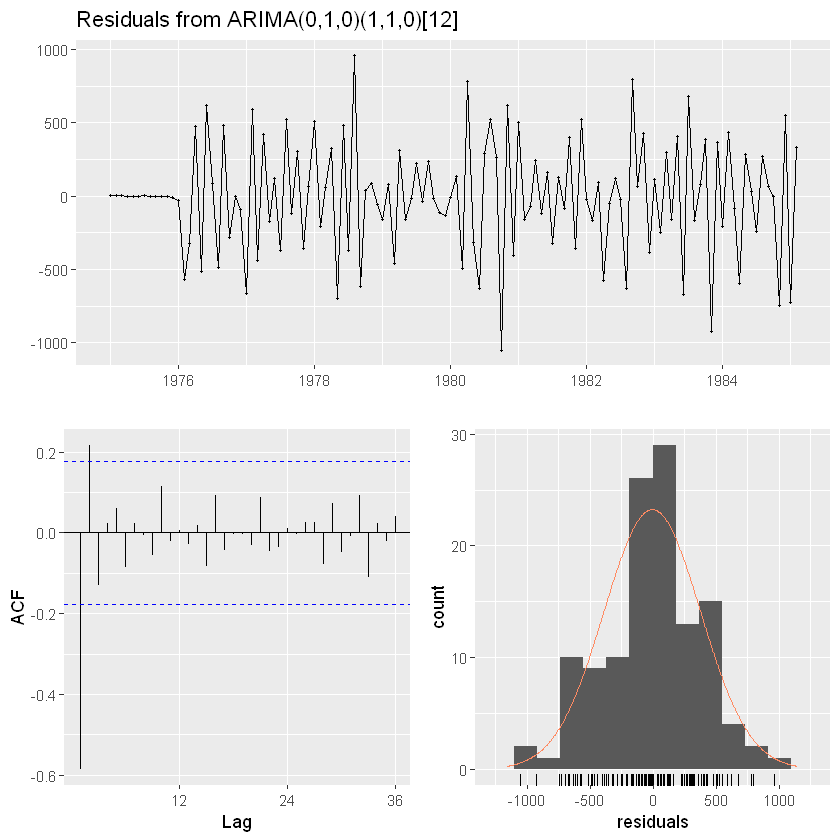

In [17]:
checkresiduals(fit1)

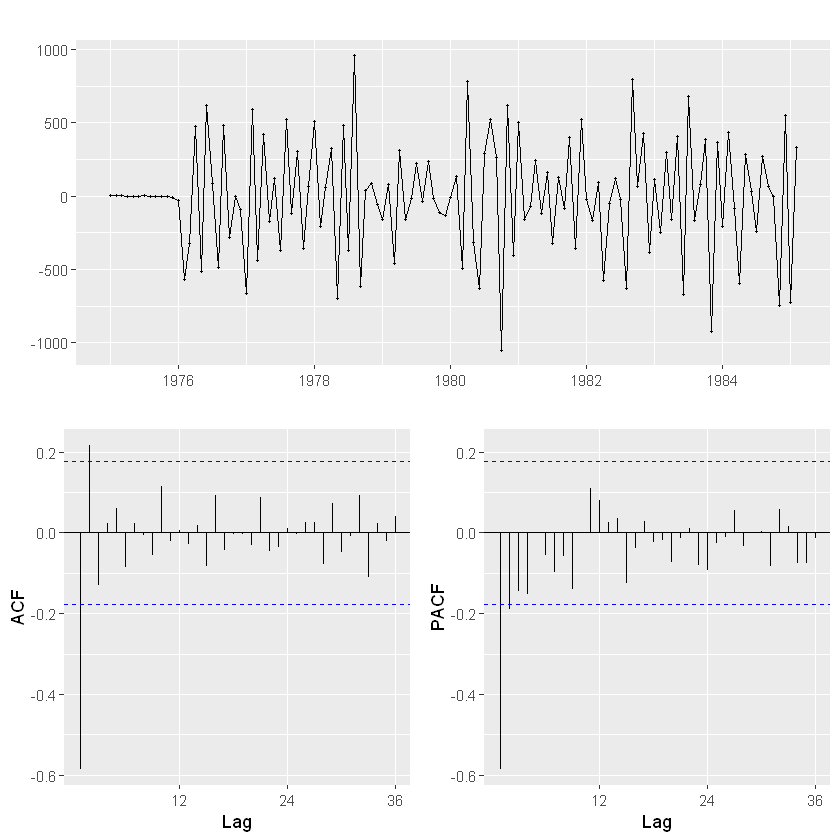

In [18]:
ggtsdisplay(fit1$residuals)

In [19]:
fit2 <- Arima(y,order=c(0,1,0),
             seasonal = c(0,1,1),
             lambda = NULL,
             include.constant = TRUE)

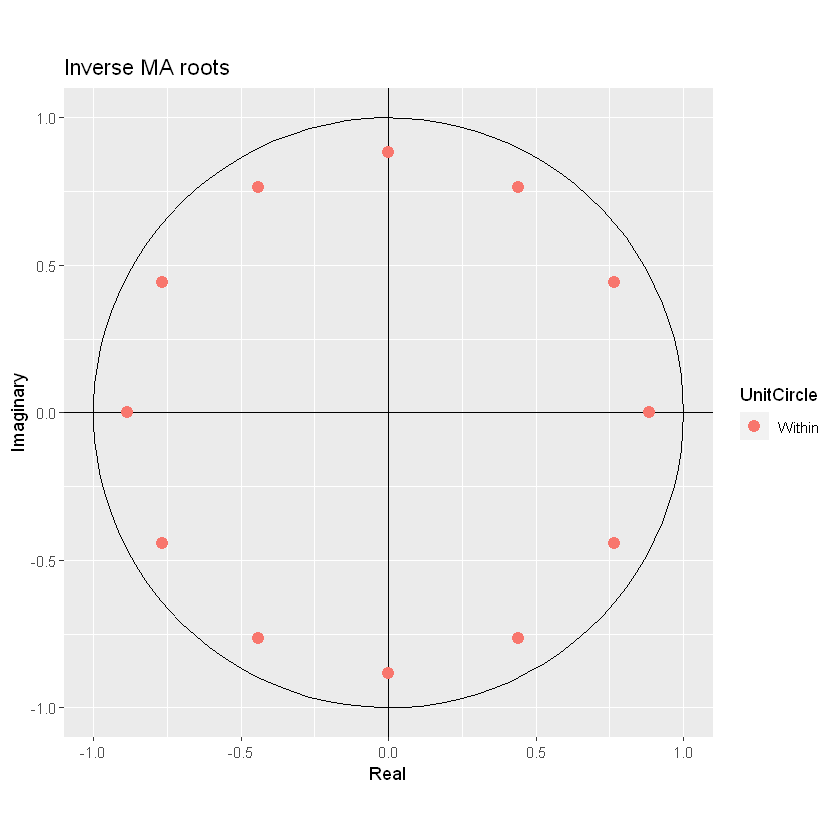

In [20]:
autoplot(fit2)

In [21]:
coeftest(fit2)


z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)  
sma1 -0.227228   0.097426 -2.3323  0.01968 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


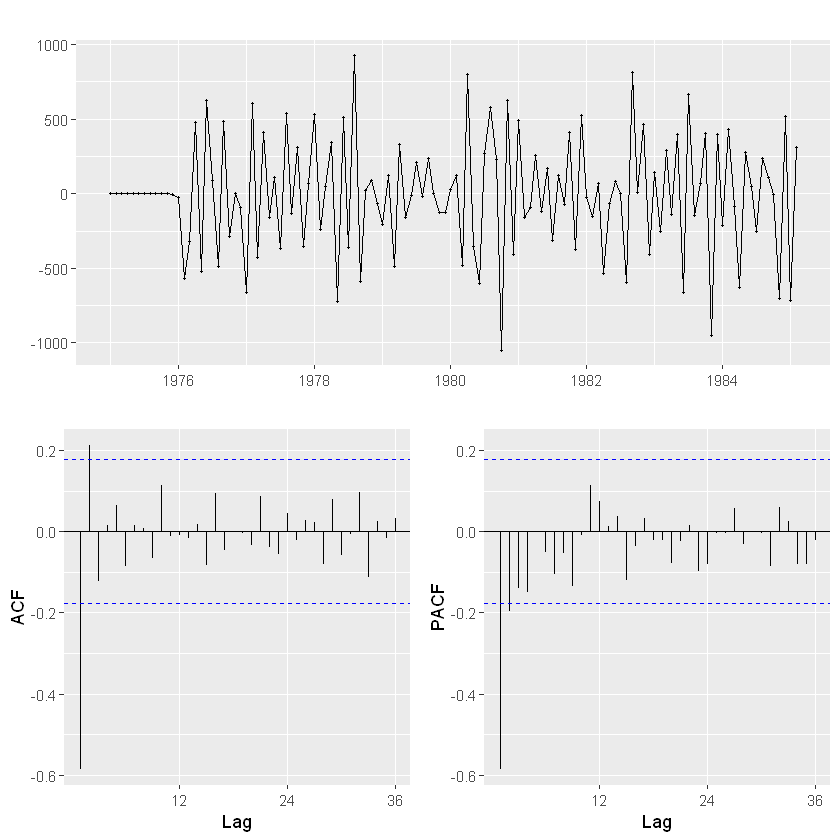

In [22]:
ggtsdisplay(fit2$residuals)

In [23]:
summary(fit1)

Series: y 
ARIMA(0,1,0)(1,1,0)[12] 

Coefficients:
         sar1
      -0.2397
s.e.   0.0976

sigma^2 estimated as 165179:  log likelihood=-809.32
AIC=1622.64   AICc=1622.75   BIC=1628.02

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -4.782262 382.3924 290.9833 -0.1062167 2.770973 0.5705246
                   ACF1
Training set -0.5848004


In [24]:
summary(fit2)

Series: y 
ARIMA(0,1,0)(0,1,1)[12] 

Coefficients:
         sma1
      -0.2272
s.e.   0.0974

sigma^2 estimated as 165911:  log likelihood=-809.52
AIC=1623.05   AICc=1623.16   BIC=1628.43

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -4.850103 383.2384 291.5163 -0.1083654 2.780272 0.5715697
                   ACF1
Training set -0.5854456


In [26]:
fit3 <- Arima(y,order=c(0,1,1),
             seasonal = c(0,1,1),
             lambda = NULL,
             include.constant = TRUE)

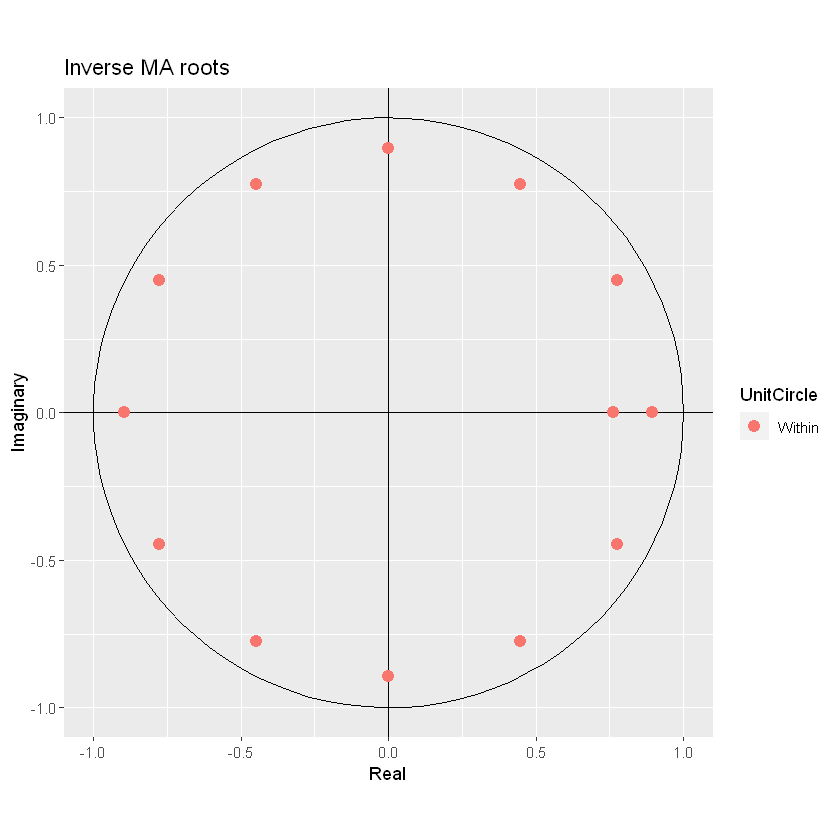

In [27]:
autoplot(fit3)

In [28]:
coeftest(fit3)


z test of coefficients:

      Estimate Std. Error  z value  Pr(>|z|)    
ma1  -0.763564   0.070543 -10.8240 < 2.2e-16 ***
sma1 -0.265649   0.095497  -2.7818  0.005407 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


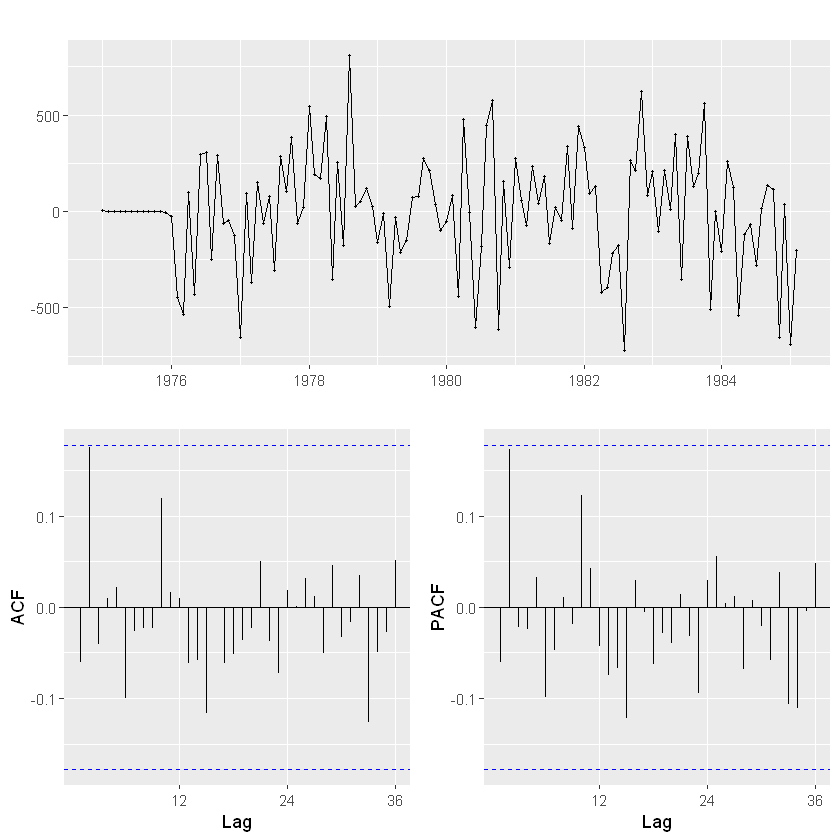

In [30]:
ggtsdisplay(fit3$residuals)

In [31]:
summary(fit3)

Series: y 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.7636  -0.2656
s.e.   0.0705   0.0955

sigma^2 estimated as 98515:  log likelihood=-781.18
AIC=1568.35   AICc=1568.58   BIC=1576.43

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.7373329 293.9437 218.1653 -0.04179531 2.063443 0.4277518
                    ACF1
Training set -0.06099511



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 13.704, df = 22, p-value = 0.9117

Model df: 2.   Total lags used: 24



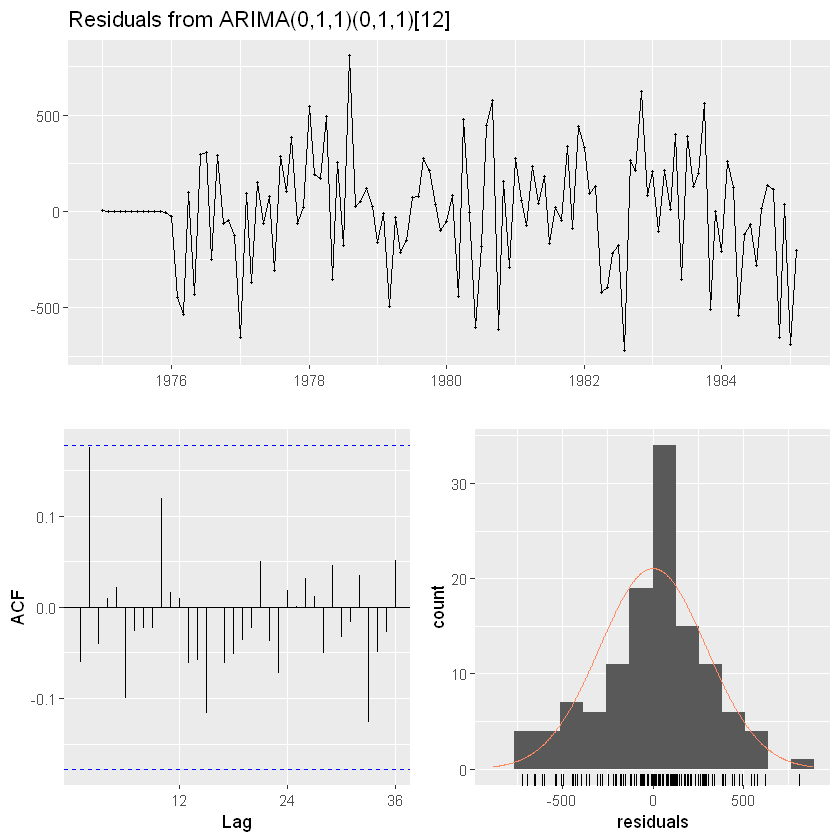

In [32]:
checkresiduals(fit3)

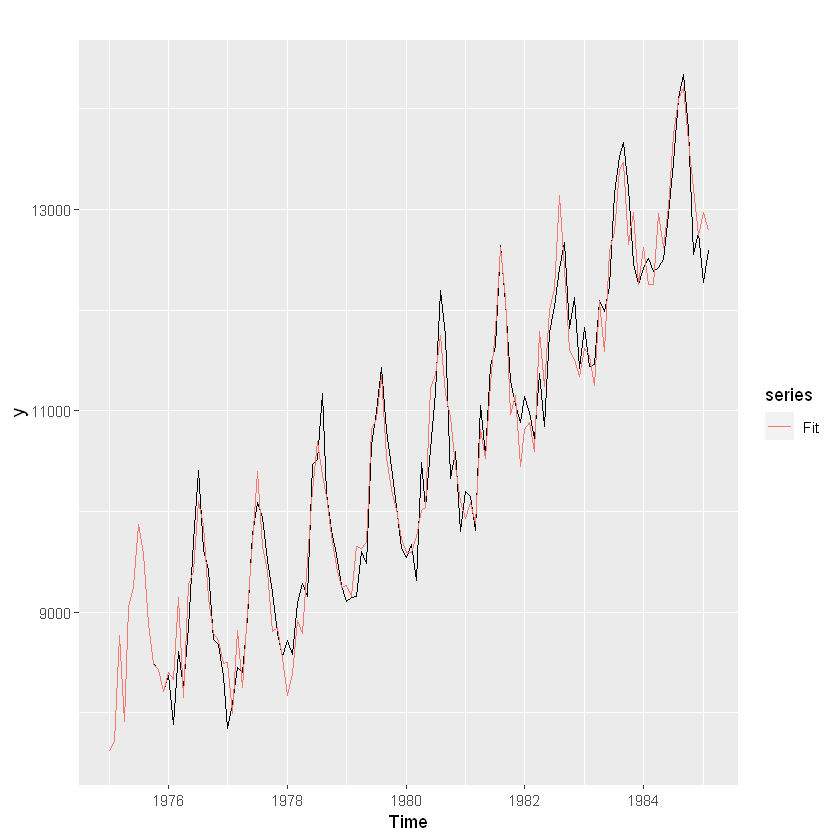

In [33]:
autoplot(y)+
autolayer(fit3$fitted,series ="Fit")

In [34]:
auto.arima(y,trace = TRUE)


 ARIMA(2,1,2)(1,1,1)[12]                    : 1573.07
 ARIMA(0,1,0)(0,1,0)[12]                    : 1626.453
 ARIMA(1,1,0)(1,1,0)[12]                    : 1577.552
 ARIMA(0,1,1)(0,1,1)[12]                    : 1568.583
 ARIMA(0,1,1)(0,1,0)[12]                    : 1573.771
 ARIMA(0,1,1)(1,1,1)[12]                    : 1570.169
 ARIMA(0,1,1)(0,1,2)[12]                    : 1569.963
 ARIMA(0,1,1)(1,1,0)[12]                    : 1568.014
 ARIMA(0,1,1)(2,1,0)[12]                    : 1570.168
 ARIMA(0,1,1)(2,1,1)[12]                    : 1572.225
 ARIMA(0,1,0)(1,1,0)[12]                    : 1622.754
 ARIMA(1,1,1)(1,1,0)[12]                    : 1568.605
 ARIMA(0,1,2)(1,1,0)[12]                    : 1569.123
 ARIMA(1,1,2)(1,1,0)[12]                    : 1569.849

 Best model: ARIMA(0,1,1)(1,1,0)[12]                    



Series: y 
ARIMA(0,1,1)(1,1,0)[12] 

Coefficients:
          ma1     sar1
      -0.7665  -0.2824
s.e.   0.0702   0.0977

sigma^2 estimated as 97884:  log likelihood=-780.89
AIC=1567.79   AICc=1568.01   BIC=1575.86

In [36]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


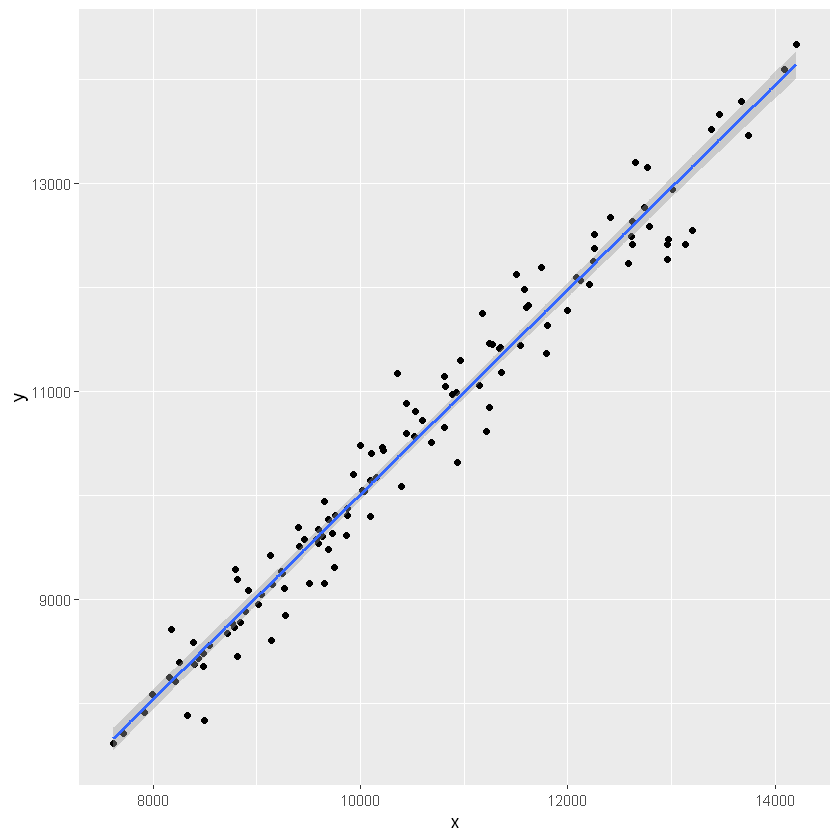

In [39]:
df <- data.frame(y=y,x=fit3$fitted)
ggplot(df,aes(x =x ,y=y))+
geom_point()+
geom_smooth(method='lm',
           formula=y~x)